# U.S. Fish & Wildlife Service

### Data Gathering

In [1]:
import pandas as pd

In [45]:
# All plants and animals (9612 records, 15 columns)
species = pd.read_html('../Data/fws.html', header=0)[0]
print(species.shape)
species.head()

(9612, 15)


,Scientific Name,Common Name,Inverted Common Name,Species Code,Population Code,CurrentDistribution,Family,First Listed,Species Group,Lead Region,Federal Listing Status,Regions ofOccurrence,U.S. or ForeignListed,Vertebrate/Invertebrate/Plant,Where Listed
0,Abies fraseri,Fraser fir,"Fir, Fraser",R00B,P01,"NC, VA;",Pinaceae,NaN,Conifers and Cycads,4,Not Listed,"4, 5",US,P,Wherever found
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Fir, Guatemalan (=pinabete)",R003,P01,"Mexico, Honduras, Guatemala, El Salvador",Pinaceae,"Dec 10, 1979",Conifers and Cycads,Foreign,Threatened,NaN,Foreign,P,Wherever found
2,Ablautus schlingeri,Oso Flaco robber fly,"Robber fly, Oso Flaco",I0O3,I01,CA;,Asilidae,NaN,Insects,1,Not Listed,8,US,I,Wherever found
3,Abronia alpina,Ramshaw Meadows sand-verbena,"Sand-verbena, Ramshaw Meadows",Q009,P01,CA;,Nyctaginaceae,NaN,Flowering Plants,8,Not Listed,8,US,P,Wherever found
4,Abronia ammophila,Yellowstone Sand Verbena,Verbena Yellowstone Sand,Q3LO,P01,NaN,Nyctaginaceae,NaN,Flowering Plants,6,Not Listed,NaN,US,P,Wherever found


### Feature Selection

In [46]:
# print unique values in each column
for column in species.columns:
    print(column + ': ' + str(len(species[column].unique())))

Scientific Name: 9318
Common Name: 7129
Inverted Common Name: 7108
Species Code: 9430
Population Code: 20
CurrentDistribution: 1678
Family: 900
First Listed: 638
Species Group: 20
Lead Region: 12
Federal Listing Status: 19
Regions ofOccurrence: 58
U.S. or ForeignListed: 4
Vertebrate/Invertebrate/Plant: 3
Where Listed: 322


In [47]:
# drop uninformative columns
species = species.drop(['Inverted Common Name',
                        'Species Code',
                        'Population Code',
                        'Family',
                        'First Listed',
                        'Regions ofOccurrence',
                        'U.S. or ForeignListed',
                        'Where Listed'], axis=1)

In [48]:
print(species.shape)
species.head()

(9612, 7)


,Scientific Name,Common Name,CurrentDistribution,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant
0,Abies fraseri,Fraser fir,"NC, VA;",Conifers and Cycads,4,Not Listed,P
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Mexico, Honduras, Guatemala, El Salvador",Conifers and Cycads,Foreign,Threatened,P
2,Ablautus schlingeri,Oso Flaco robber fly,CA;,Insects,1,Not Listed,I
3,Abronia alpina,Ramshaw Meadows sand-verbena,CA;,Flowering Plants,8,Not Listed,P
4,Abronia ammophila,Yellowstone Sand Verbena,NaN,Flowering Plants,6,Not Listed,P


### Missing Data

In [49]:
import missingno as msno

Scientific Name                    0
Common Name                        0
CurrentDistribution              860
Species Group                      0
Lead Region                       73
Federal Listing Status             0
Vertebrate/Invertebrate/Plant      0
dtype: int64


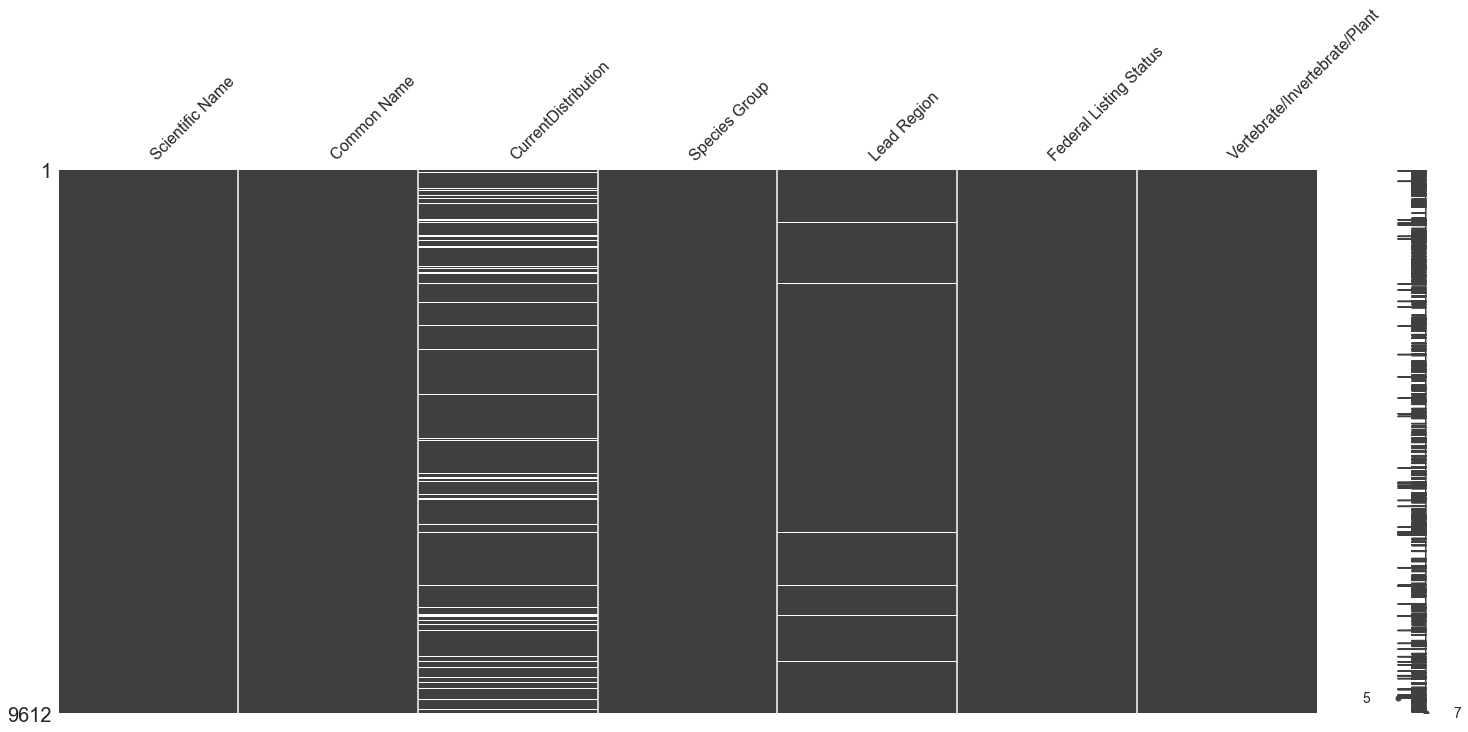

In [50]:
# check species data for null values
print(species.isnull().sum())

# visualize null values
msno.matrix(species)

In [51]:
# ~10% of records that do not have geographic information
print(species.isnull().sum().sum() / species.shape[0])

# drop records without geographic information
species = species.dropna()

0.0970661672908864


In [52]:
print(species.shape)
species.head()

(8751, 7)


,Scientific Name,Common Name,CurrentDistribution,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant
0,Abies fraseri,Fraser fir,"NC, VA;",Conifers and Cycads,4,Not Listed,P
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Mexico, Honduras, Guatemala, El Salvador",Conifers and Cycads,Foreign,Threatened,P
2,Ablautus schlingeri,Oso Flaco robber fly,CA;,Insects,1,Not Listed,I
3,Abronia alpina,Ramshaw Meadows sand-verbena,CA;,Flowering Plants,8,Not Listed,P
6,Abronia ammphila,[Unnamed] sand-verbena,WY;,Flowering Plants,6,Not Listed,P


### Feature Cleaning

In [53]:
# unique species groups
species.groupby('Species Group')['Species Group'].count()

Species Group
Amphibians                   138
Annelid Worms                  2
Arachnids                     50
Birds                        475
Clams                        203
Conifers and Cycads           22
Corals                         3
Crustaceans                  230
Ferns and Allies              95
Fishes                       429
Flatworms and Roundworms       8
Flowering Plants            4584
Hydroids                       1
Insects                     1063
Lichens                       17
Mammals                      660
Millipedes                     1
Reptiles                     257
Snails                       506
Sponges                        7
Name: Species Group, dtype: int64

In [54]:
# unique species types
species.groupby('Vertebrate/Invertebrate/Plant')['Vertebrate/Invertebrate/Plant'].count()

Vertebrate/Invertebrate/Plant
I    2074
P    4718
V    1959
Name: Vertebrate/Invertebrate/Plant, dtype: int64

In [55]:
# unique current distribution
print(species.groupby('Lead Region')['Lead Region'].count())

# drop species in foreign geographic regions
species = species[species['Lead Region'] != 'Foreign']

# drop species in geographic region 9 (not documented)
species = species[species['Lead Region'] != '9']

Lead Region
1          3531
2           989
3           211
4          1804
5           355
6           615
7            76
8           480
9             1
Foreign     624
NMFS         65
Name: Lead Region, dtype: int64


In [56]:
# list of US states
state_abbrevs = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# stack records with multiple US states in current distribution
species_stack = pd.DataFrame(columns=species.columns)

for abbrev in state_abbrevs:
    state = species[species['CurrentDistribution'].str.contains(abbrev)]
    state = state.assign(StateDistribution=abbrev)
    species_stack = species_stack.append(state, ignore_index=True, sort=False)
    
# drop current distribution
species = species_stack.drop(['CurrentDistribution'], axis=1)

In [57]:
# unique federal listing status
print(species.groupby('Federal Listing Status')['Federal Listing Status'].count())

# keep records for endangered, not listed and threatened species
species = species[(species['Federal Listing Status'] == 'Endangered') |
                  (species['Federal Listing Status'] == 'Not Listed') |
                  (species['Federal Listing Status'] == 'Threatened')]

Federal Listing Status
Candidate                                                    34
Endangered                                                 1901
Experimental Population, Non-Essential                      260
Extinction                                                   17
Not Listed                                                 9074
Original Data in Error - Act Amendment                        1
Original Data in Error - New Information Discovered           9
Original Data in Error - Not a listable entity                7
Original Data in Error - Taxonomic Revision                   9
Proposed Endangered                                           3
Proposed Similarity of Appearance to a Threatened Taxon       1
Proposed Threatened                                          62
Recovery                                                     83
Similarity of Appearance to a Threatened Taxon               40
Threatened                                                  817
Under Review in t

In [58]:
# drop duplicate rows
species = species.drop_duplicates()

In [59]:
print(species.shape)
species.head()

(11737, 7)


,Scientific Name,Common Name,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant,StateDistribution
0,Accipiter gentilis,Northern goshawk,Birds,2,Not Listed,V,AL
1,Acipenser fulvescens,Lake sturgeon,Fishes,3,Not Listed,V,AL
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,4,Threatened,V,AL
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,4,Not Listed,I,AL
4,Agrimonia incisa,Incised groovebur,Flowering Plants,4,Not Listed,P,AL


### Exploratory Data Analysis

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [61]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11737 entries, 0 to 13390
Data columns (total 7 columns):
Scientific Name                  11737 non-null object
Common Name                      11737 non-null object
Species Group                    11737 non-null object
Lead Region                      11737 non-null object
Federal Listing Status           11737 non-null object
Vertebrate/Invertebrate/Plant    11737 non-null object
StateDistribution                11737 non-null object
dtypes: object(7)
memory usage: 733.6+ KB


In [62]:
species.describe()

,Scientific Name,Common Name,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant,StateDistribution
count,11737,11737,11737,11737,11737,11737,11737
unique,7116,5217,20,9,3,3,50
top,Accipiter gentilis,No common name,Flowering Plants,1,Not Listed,P,CA
freq,44,1807,6288,3904,9040,6492,1697


In [63]:
species.columns = ['Scientific Name',
                   'Common Name',
                   'Group',
                   'Region',
                   'Federal Listing Status',
                   'VIP',
                   'State']

In [64]:
species.head()

,Scientific Name,Common Name,Group,Region,Federal Listing Status,VIP,State
0,Accipiter gentilis,Northern goshawk,Birds,2,Not Listed,V,AL
1,Acipenser fulvescens,Lake sturgeon,Fishes,3,Not Listed,V,AL
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,4,Threatened,V,AL
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,4,Not Listed,I,AL
4,Agrimonia incisa,Incised groovebur,Flowering Plants,4,Not Listed,P,AL


Group
Amphibians                   143
Annelid Worms                  4
Arachnids                     50
Birds                        681
Clams                        497
Conifers and Cycads           20
Corals                         2
Crustaceans                  226
Ferns and Allies             158
Fishes                       733
Flatworms and Roundworms       9
Flowering Plants            6288
Hydroids                       1
Insects                     1460
Lichens                       26
Mammals                      661
Millipedes                     1
Reptiles                     283
Snails                       487
Sponges                        7
Name: Group, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

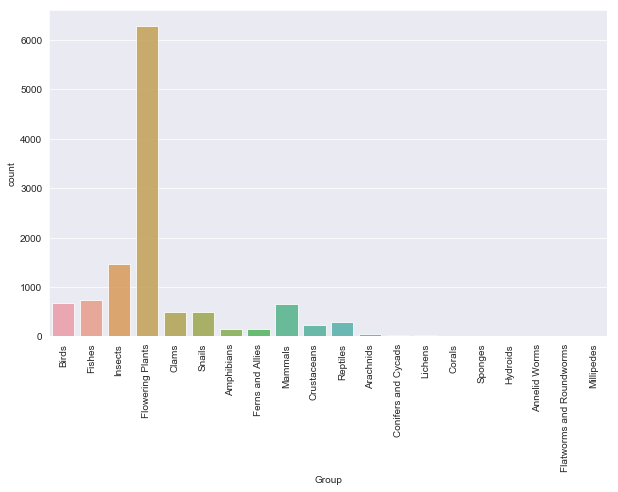

In [66]:
print(species.groupby('Group')['Group'].count())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['Group'], alpha=0.8)
plt.xticks(rotation=90)

Region
1       3904
2       1271
3       1071
4       2790
5        989
6       1053
7         83
8        519
NMFS      57
Name: Region, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

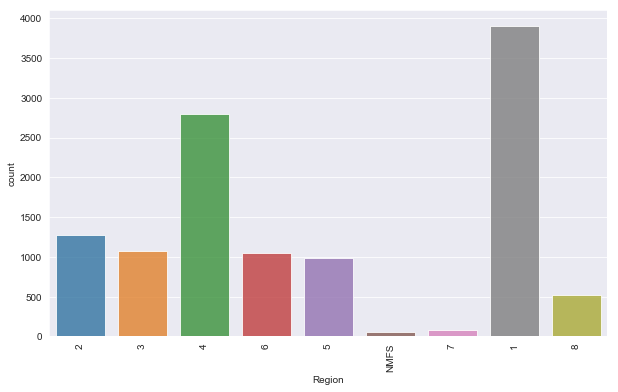

In [67]:
print(species.groupby('Region')['Region'].count())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['Region'], alpha=0.8)
plt.xticks(rotation=90)

VIP
I    2744
P    6492
V    2501
Name: VIP, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

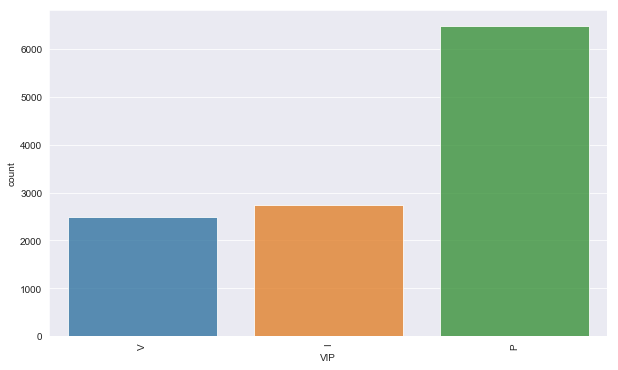

In [68]:
print(species.groupby('VIP')['VIP'].count())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['VIP'], alpha=0.8)
plt.xticks(rotation=90)

State
AK      88
AL     453
AR     165
AZ     433
CA    1697
CO     216
CT      52
DE      83
FL     495
GA     332
HI    1480
IA      75
ID     175
IL     141
IN     124
KS      66
KY     180
LA     103
MA      78
MD      97
ME      64
MI     102
MN      88
MO     142
MS     138
MT      91
NC     359
ND      32
NE      49
NH      55
NJ      83
NM     247
NV     439
NY     122
OH     114
OK      97
OR     445
PA     125
RI      32
SC     174
SD      46
TN     333
TX     521
UT     426
VA     254
VT      43
WA     223
WI     101
WV     129
WY     130
Name: State, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

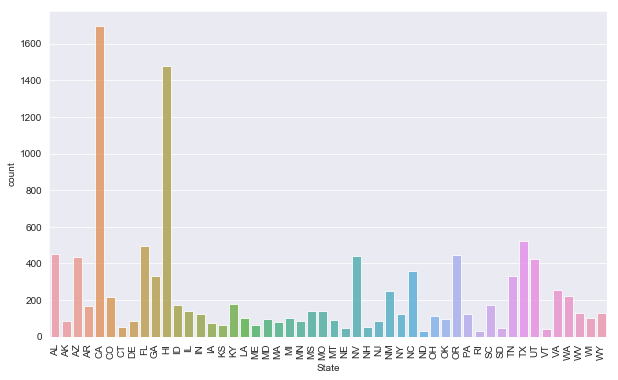

In [69]:
print(species.groupby('State')['State'].count())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['State'], alpha=0.8)
plt.xticks(rotation=90)

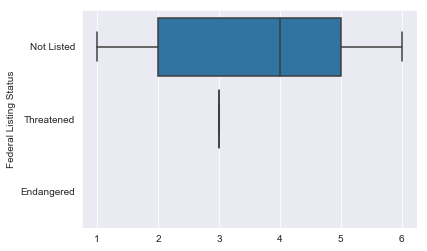

In [73]:
sns.boxplot(x=[1,2,3,4,5,6], y='Federal Listing Status', data=species)

### Feature Engineering

In [23]:
#create dummy variables
species = pd.get_dummies(data=species, columns=['Group', 'Region', 'VIP', 'State'])
print(species.shape)
species.head()

(11737, 85)


,Scientific Name,Common Name,Federal Listing Status,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,Accipiter gentilis,Northern goshawk,Not Listed,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acipenser fulvescens,Lake sturgeon,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Threatened,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agarodes alabamensis,[Unnamed] caddisfly,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agrimonia incisa,Incised groovebur,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Create target and feature variables
y = species['Federal Listing Status']
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name'], axis = 1)

Federal Listing Status
Endangered    1899
Not Listed    9040
Threatened     798
Name: Federal Listing Status, dtype: int64
Endangered: 0.16179602964982534
Not Listed: 0.7702138536252876
Threatened: 0.06799011672488711


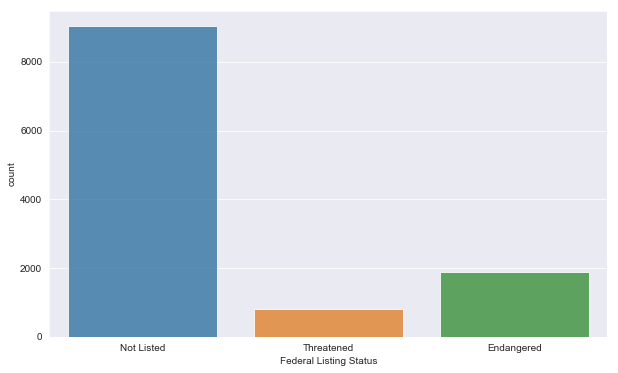

In [25]:
# federal listing status
print(species.groupby('Federal Listing Status')['Federal Listing Status'].count())
print('Endangered: ' + str((species['Federal Listing Status'] == 'Endangered').sum() / species.shape[0]))
print('Not Listed: ' + str((species['Federal Listing Status'] == 'Not Listed').sum() / species.shape[0]))
print('Threatened: ' + str((species['Federal Listing Status'] == 'Threatened').sum() / species.shape[0]))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(species['Federal Listing Status'], alpha=0.8)

### Data Scaling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# federal listing status
print('Test Data')
print('Endangered: ' + str((y_test == 'Endangered').sum() / y_test.count()))
print('Not Listed: ' + str((y_test == 'Not Listed').sum() / y_test.count()))
print('Threatened: ' + str((y_test == 'Threatened').sum() / y_test.count()))

Test Data
Endangered: 0.16695059625212946
Not Listed: 0.7597955706984668
Threatened: 0.07325383304940375


### Class Imbalance

In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [29]:
# DummyClassifier to predict majority class
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred_train = dummy.predict(X_train)
dummy_pred_test = dummy.predict(X_test)
dummy

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [30]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train, dummy_pred_train))
print('Train F1 score: ', f1_score(y_train, dummy_pred_train, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred_test))
print('Test F1 score: ', f1_score(y_test, dummy_pred_test, average='weighted'))

Train Accuracy score:  0.7728192565768452
Train F1 score:  0.6737851037214285
Test Accuracy score:  0.7597955706984668
Test F1 score:  0.656086785152984


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
log_reg_clf = LogisticRegression(C=1e12, solver='liblinear')
log_reg_clf.fit(X_train, y_train)
y_pred_train = log_reg_clf.predict(X_train)
y_pred_test = log_reg_clf.predict(X_test)
log_reg_clf

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train, y_pred_train))
print('Train F1 score: ', f1_score(y_train, y_pred_train, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='weighted'))

Train Accuracy score:  0.810096921929918
Train F1 score:  0.76583235304541
Test Accuracy score:  0.8036626916524702
Test F1 score:  0.7568596382773838


9389
Endangered: 0.16050697624880178
Not Listed: 0.7728192565768452
Threatened: 0.06667376717435297


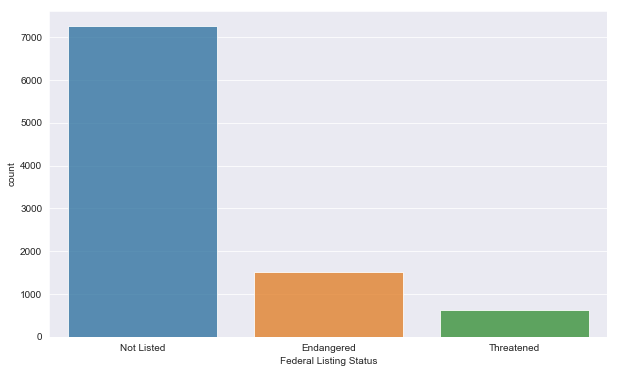

In [33]:
# federal listing status
print(y_train.count())
print('Endangered: ' + str((y_train == 'Endangered').sum() / y_train.count()))
print('Not Listed: ' + str((y_train == 'Not Listed').sum() / y_train.count()))
print('Threatened: ' + str((y_train == 'Threatened').sum() / y_train.count()))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train, alpha=0.8)

In [34]:
keys = list(y_train.unique())
values = np.ones((3), dtype=int) * (y_train == 'Not Listed').sum()
sample_ratio = dict(zip(keys, values))
sample_ratio

{'Not Listed': 7256, 'Endangered': 7256, 'Threatened': 7256}

21768
Endangered: 0.3333333333333333
Not Listed: 0.3333333333333333
Threatened: 0.3333333333333333


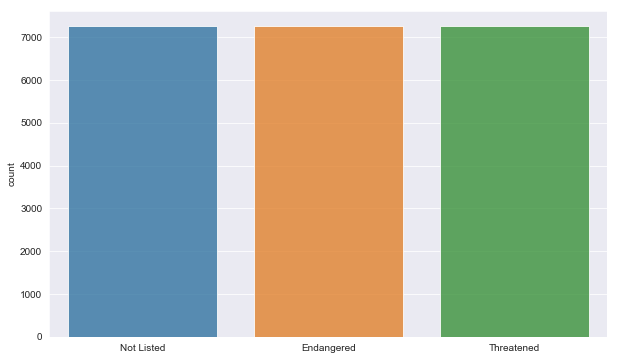

In [35]:
species['Federal Listing Status'].unique()

sm = SMOTE(ratio=sample_ratio)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

# federal listing status
print(len(y_train_sm))
print('Endangered: ' + str((y_train_sm == 'Endangered').sum() / len(y_train_sm)))
print('Not Listed: ' + str((y_train_sm == 'Not Listed').sum() / len(y_train_sm)))
print('Threatened: ' + str((y_train_sm == 'Threatened').sum() / len(y_train_sm)))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train_sm, alpha=0.8)

In [36]:
# DummyClassifier to predict majority class
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred_train_sm = dummy.predict(X_train_sm)
dummy_pred_test = dummy.predict(X_test)
dummy

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [37]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train_sm, dummy_pred_train_sm))
print('Train F1 score: ', f1_score(y_train_sm, dummy_pred_train_sm, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred_test))
print('Test F1 score: ', f1_score(y_test, dummy_pred_test, average='weighted'))

Train Accuracy score:  0.3333333333333333
Train F1 score:  0.16666666666666666
Test Accuracy score:  0.7597955706984668
Test F1 score:  0.656086785152984


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
log_reg_clf = LogisticRegression(C=1e12, solver='liblinear')
log_reg_clf.fit(X_train_sm, y_train_sm)
y_pred_train_sm = log_reg_clf.predict(X_train_sm)
y_pred_test = log_reg_clf.predict(X_test)
log_reg_clf

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [39]:
# checking training metrics
print('Train Accuracy score: ', accuracy_score(y_train_sm, y_pred_train_sm))
print('Train F1 score: ', f1_score(y_train_sm, y_pred_train_sm, average='weighted'))

# checking test metrics
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))
print('Test F1 score: ', f1_score(y_test, y_pred_test, average='weighted'))

Train Accuracy score:  0.6538956266078647
Train F1 score:  0.6461623785905141
Test Accuracy score:  0.7555366269165247
Test F1 score:  0.7513458843942121


### Model Fitting

### Model Evaluation